In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")


df = pd.read_json('/kaggle/input/pii-detection-removal-from-educational-data/train.json', orient="records").set_index("document")
df.head()

,full_text,tokens,trailing_whitespace,labels
document,,,,
7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."


## Validating Data Structure

#### List lengths:

In [2]:
df_list_lengths = df[["tokens", "trailing_whitespace", "labels"]].map(len)

df_list_lengths

,tokens,trailing_whitespace,labels
document,,,
7,753,753,753
10,563,563,563
16,729,729,729
20,1071,1071,1071
56,1927,1927,1927
...,...,...,...
22678,601,601,601
22679,433,433,433
22681,633,633,633


For every essays, the length of `labels`, `tokens` and `trailing_whitespace` is equal:

In [3]:
df_list_lengths.nunique(axis=1).eq(1).all()

True

## Essays Lengths Distribution

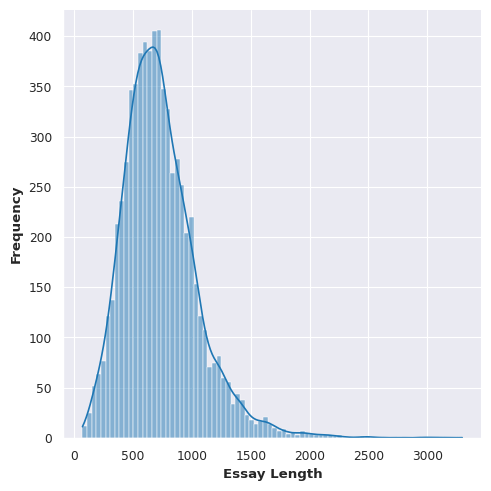

In [4]:
import seaborn as sns

sns.set_context("paper")
sns.set_style("darkgrid")

ax = sns.displot(data=df_list_lengths, x="tokens", kde=True)
ax.set_axis_labels("Essay Length", "Frequency", fontdict={'weight': 'bold'})

## Relation between tokens, trailing_whitespace and full_text

In [5]:
tokens = df['tokens'].explode()
whitespaces = df['trailing_whitespace'].explode().replace({True: " ", False: ""})

padded_tokens = tokens.str.cat(whitespaces)
recovered_full_text = padded_tokens.groupby("document").agg(''.join)

(recovered_full_text == df["full_text"]).all()  # all recovered texts are equal to original ones!

True

Data is not corrupted.

## Paragraph Number Distribution

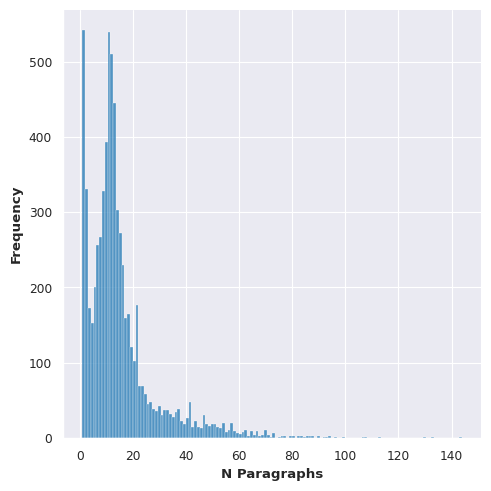

In [6]:
n_paragraphs = (tokens == "\n\n").groupby("document").sum()

ax = sns.displot(n_paragraphs)
ax.set_axis_labels("N Paragraphs", "Frequency", fontdict={'weight': 'bold'})

## Paragraph Lengths

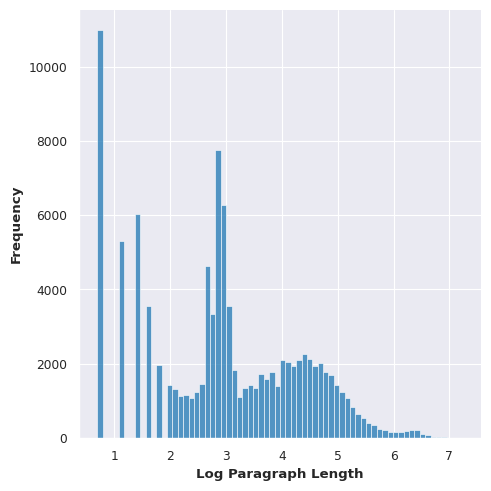

In [7]:
import numpy as np

paragrahs_lengths = df['tokens'].apply(lambda toks: (pd.Series(["\n\n"] + toks) == "\n\n").replace(False, None).dropna().index.diff().dropna()).explode().astype(float)
log_paragraphs_length = np.log(paragrahs_lengths)

ax = sns.displot(log_paragraphs_length)
ax.set_axis_labels("Log Paragraph Length", "Frequency", fontdict={'weight': 'bold'})

We will later use data augmentations based on the essays paragraphs.